In [ ]:
!pip install osmnx contextily
!pip install -U kaleido
!pip install imageio
!pip install geopandas
!pip install openrouteservice
!pip install folium tqdm polyline


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.6/99.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 52.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 80.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 111.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import random
import time


In [ ]:
# Lee el archivo CSV
ciudades_df = pd.read_csv('/content/capitales_mexico (2).csv')

# Extrae las coordenadas en una lista o array
coordenadas = ciudades_df[['Latitud', 'Longitud']].values
n_ciudades = len(coordenadas)


In [ ]:
costos = np.load('costos.npy')
print(costos)


[[           inf  7099.93541534  4040.55702857 ...  3392.84625397
   7318.29974339   400.99101058]
 [ 6826.28899312            inf  3398.1261746  ... 12168.87710159
  10130.21156878  6478.48313016]
 [ 5691.42675873  3398.05020476            inf ...  9729.30823122
  13554.76038783  5243.62222857]
 ...
 [ 3485.43427513  7099.3117381   5462.71597884 ...            inf
   4204.55324233  3076.57957619]
 [ 7356.74002593 12839.95453651  8279.02306243 ...  4248.35505132
             inf  6947.88665979]
 [  405.45723757  6752.39344762  3691.01506085 ...  3893.46561481
   7718.91910423            inf]]


In [ ]:
print(*costos)

[          inf 7099.93541534 4040.55702857 6885.09232275 5828.57903492
 3510.55518413 2196.21895291 1340.46628519 2215.83851746 1206.85206984
  902.72922857 3279.50021217 2159.36627302 1176.43551111 1952.5759418
 1479.25262751 2551.26528148 2398.37728519 1828.8860836  4015.31766032
 2935.87931587 1323.56852381 7050.22116825  517.7975381  2249.26509471
 3839.40372487 5430.7911582  1764.97853915 2743.29145873 3392.84625397
 7318.29974339  400.99101058] [ 6826.28899312            inf  3398.1261746   9697.00548095
  8890.49086032  3329.34528148 10972.9321963   6238.20973757
  9272.47577513  7025.33108783  9677.85153915 12047.78766138
 10935.39578783  8390.61321429 10535.29801905  9683.14561005
 11319.55406349  7265.64730741  4963.65384497 12791.34717513
 11711.90883069  9837.22361111 10250.13432646  6977.74576508
  4711.47223333  2069.51352328  8682.7043164   5630.93070899
 11519.32230635 12168.87710159 10130.21156878  6478.48313016] [ 5691.42675873  3398.05020476            inf 13121.5543

In [ ]:
# Normalizar matriz de costos
"""costos_norm = costos.copy()
costos_norm[~np.isinf(costos_norm)] = (costos_norm[~np.isinf(costos_norm)] - np.min(costos_norm[~np.isinf(costos_norm)])) / (np.max(costos_norm[~np.isinf(costos_norm)]) - np.min(costos_norm[~np.isinf(costos_norm)]))
costos = costos_norm"""

'costos_norm = costos.copy()\ncostos_norm[~np.isinf(costos_norm)] = (costos_norm[~np.isinf(costos_norm)] - np.min(costos_norm[~np.isinf(costos_norm)])) / (np.max(costos_norm[~np.isinf(costos_norm)]) - np.min(costos_norm[~np.isinf(costos_norm)]))\ncostos = costos_norm'

In [ ]:
n_hormigas = 50
n_iteraciones = 1000
alpha = 1.0  # Importancia de la feromona
beta = 5.0   # Importancia de la visibilidad (1/costo)
evaporacion = 0.2
feromona_inicial = 1.0


In [ ]:
feromonas = np.ones((n_ciudades, n_ciudades)) * feromona_inicial


Iteración 1: Mejor costo = 48171.33638994709
Iteración 2: Mejor costo = 44977.065610582016
Iteración 3: Mejor costo = 44977.065610582016
Iteración 4: Mejor costo = 44977.065610582016
Iteración 5: Mejor costo = 44977.065610582016
Iteración 6: Mejor costo = 44977.065610582016
Iteración 7: Mejor costo = 44977.065610582016
Iteración 8: Mejor costo = 44977.065610582016
Iteración 9: Mejor costo = 44977.065610582016
Iteración 10: Mejor costo = 44977.065610582016
Iteración 11: Mejor costo = 44977.065610582016
Iteración 12: Mejor costo = 44977.065610582016
Iteración 13: Mejor costo = 44977.065610582016
Iteración 14: Mejor costo = 44977.065610582016
Iteración 15: Mejor costo = 44977.065610582016
Iteración 16: Mejor costo = 44977.065610582016
Iteración 17: Mejor costo = 44977.065610582016
Iteración 18: Mejor costo = 44977.065610582016
Iteración 19: Mejor costo = 44484.65913809525
Iteración 20: Mejor costo = 44484.65913809525
Iteración 21: Mejor costo = 44484.65913809525
Iteración 22: Mejor costo 

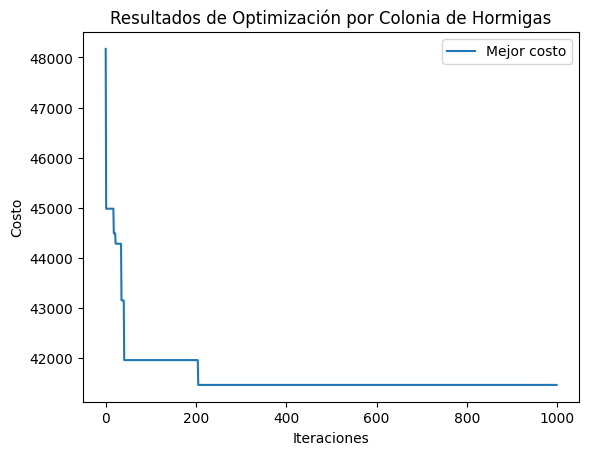

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Matriz de feromonas inicializada con unos
feromonas = np.ones((n_ciudades, n_ciudades))

def calcular_probabilidades(actual, visitados):
    """
    Calcular las probabilidades sin normalizar costos
    """
    probabilidades = np.zeros(n_ciudades)

    # Solo calcular para ciudades no visitadas
    for j in range(n_ciudades):
        if j not in visitados:
            tau = feromonas[actual][j] ** alpha  # Influencia de las feromonas
            eta = (1.0 / costos[actual][j]) ** beta  # Influencia de la distancia
            probabilidades[j] = tau * eta

    # Normalizar probabilidades
    suma = np.sum(probabilidades)
    if suma > 0:
        probabilidades = probabilidades / suma

    return probabilidades

def construir_ruta():
    """
    Construir una ruta para una hormiga
    """
    ciudad_inicial = random.randint(0, n_ciudades - 1)
    ruta = [ciudad_inicial]
    visitados = {ciudad_inicial}

    while len(visitados) < n_ciudades:
        actual = ruta[-1]
        probabilidades = calcular_probabilidades(actual, visitados)

        if np.sum(probabilidades) == 0:
            # Si no hay opciones válidas, empezar nueva ruta
            return construir_ruta()

        siguiente = np.random.choice(range(n_ciudades), p=probabilidades)
        ruta.append(siguiente)
        visitados.add(siguiente)

    ruta.append(ciudad_inicial)  # Volver al inicio
    return ruta

def calcular_costo(ruta):
    """
    Calcular el costo total de una ruta.
    """
    return sum(costos[ruta[i]][ruta[i + 1]] for i in range(len(ruta) - 1))

def actualizar_feromonas(solutions):
    """
    Actualizar las feromonas basado en las soluciones encontradas.
    """
    global feromonas
    # Evaporar feromonas
    feromonas *= (1 - evaporacion)

    # Depositar nuevas feromonas
    for ruta, costo in solutions:
        for i in range(len(ruta) - 1):
            feromonas[ruta[i], ruta[i + 1]] += 1.0 / costo
            feromonas[ruta[i + 1], ruta[i]] += 1.0 / costo  # Para mantener la bidireccionalidad

def aco():
    mejor_costo = np.inf
    mejor_ruta = None
    historial_costos = []
    mejores_rutas = []

    for iteracion in range(n_iteraciones):
        soluciones = []
        costos_iteracion = []

        # Generar rutas para cada hormiga
        for _ in range(n_hormigas):
            ruta = construir_ruta()
            costo = calcular_costo(ruta)
            soluciones.append((ruta, costo))
            costos_iteracion.append(costo)

            # Actualizar la mejor ruta si se encuentra una mejor
            if costo < mejor_costo:
                mejor_costo = costo
                mejor_ruta = ruta[:-1]  # Eliminamos el último elemento ya que es igual al primero

        # Almacenar la mejor ruta de esta iteración
        mejores_rutas.append(mejor_ruta.copy())

        # Actualizar feromonas
        actualizar_feromonas(soluciones)

        # Almacenar el costo mínimo de esta iteración
        historial_costos.append(mejor_costo)
        print(f"Iteración {iteracion + 1}: Mejor costo = {mejor_costo}")

    return mejor_ruta, mejor_costo, historial_costos, mejores_rutas

# Ejecutar el algoritmo
mejor_ruta, mejor_costo, historial_costos, mejores_rutas = aco()

# Imprimir el mejor costo final
print(f"El mejor costo final es {mejor_costo}")

# Graficar el historial de costos
plt.plot(historial_costos, label='Mejor costo')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.title('Resultados de Optimización por Colonia de Hormigas')
plt.legend()
plt.show()

In [ ]:
# Obtener los nombres de las ciudades en el orden de la mejor ruta
ruta_ciudades = ciudades_df.iloc[mejor_ruta]['Capital'].values

# Imprimir la ruta final
print("Ruta óptima:")
for ciudad in ruta_ciudades:
    print(ciudad)


Ruta óptima:
Villahermosa
Tuxtla Gutiérrez
Oaxaca de Juárez
Puebla de Zaragoza
Tlaxcala de Xicohténcatl
Pachuca de Soto
Ciudad de México
Cuernavaca
Chilpancingo de los Bravo
Toluca de Lerdo
Santiago de Querétaro
Guanajuato
Morelia
Guadalajara
Colima
Tepic
Culiacán Rosales
La Paz
Mexicali
Hermosillo
Chihuahua
Victoria de Durango
Zacatecas
Aguascalientes
San Luis Potosí
Ciudad Victoria
Monterrey
Saltillo
Xalapa-Enríquez
Chetumal
Mérida
San Francisco de Campeche


<ipython-input-21-d2370e866fd5>:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))


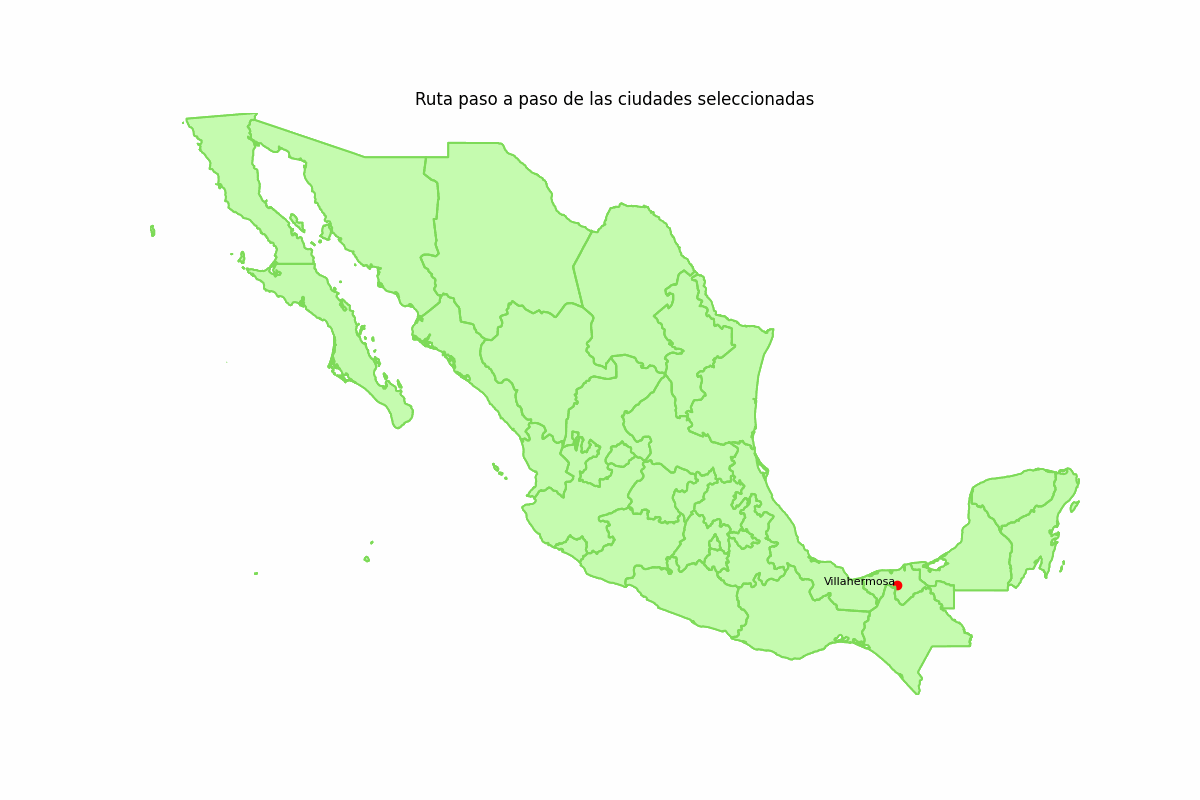

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
import geopandas as gpd
from IPython.display import Image

# Crear un directorio para guardar las imágenes
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

# Paso 3: Extraer las ciudades seleccionadas
ciudades_seleccionadas = ciudades_df.iloc[mejor_ruta]

# Mapa de México
mapa_mexico = gpd.read_file('mx.json')

# Paso 4: Crear el gráfico paso a paso y guardar cada imagen
for k in range(1, len(ciudades_seleccionadas) + 1):
    # Crear una nueva figura
    plt.figure(figsize=(12,8))

    mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')  # Líneas de frontera del mapa en gris oscuro
    mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')  # Territorio de México en gris claro

    # Trazar la línea entre las ciudades seleccionadas hasta el paso k
    plt.plot(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='red', linestyle='-')

    # Graficar los puntos de las ciudades hasta el paso k
    plt.scatter(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='red')

    # Añadir nombres a las ciudades
    for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
        plt.text(row['Longitud'], row['Latitud'], row['Capital'], fontsize=8, ha='right')

    # Añadir títulos y etiquetas
    plt.title('Ruta paso a paso de las ciudades seleccionadas')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')

    # Desactivar la cuadrícula de fondo y los ejes
    plt.grid(False)
    plt.axis('off')
    plt.margins(0)

    # Guardar la imagen del frame actual
    plt.savefig(f'{output_dir}/frame_{k}.png')
    plt.close()

# Crear el GIF a partir de las imágenes
images = []
for k in range(1, len(ciudades_seleccionadas) + 1):
    images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))

# Guardar el GIF
imageio.mimsave('ruta_recorrido.gif', images, duration=3)

# Mostrar el GIF en la consola
Image(filename='ruta_recorrido.gif')


Dividiendo ruta en segmentos...
Obteniendo rutas por segmentos...


100%|██████████| 8/8 [00:21<00:00,  2.75s/it]


Generando frames...


100%|██████████| 51/51 [00:25<00:00,  1.99it/s]
<ipython-input-22-aa3323b1346f>:154: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{frame}.png'))


Creando GIF...


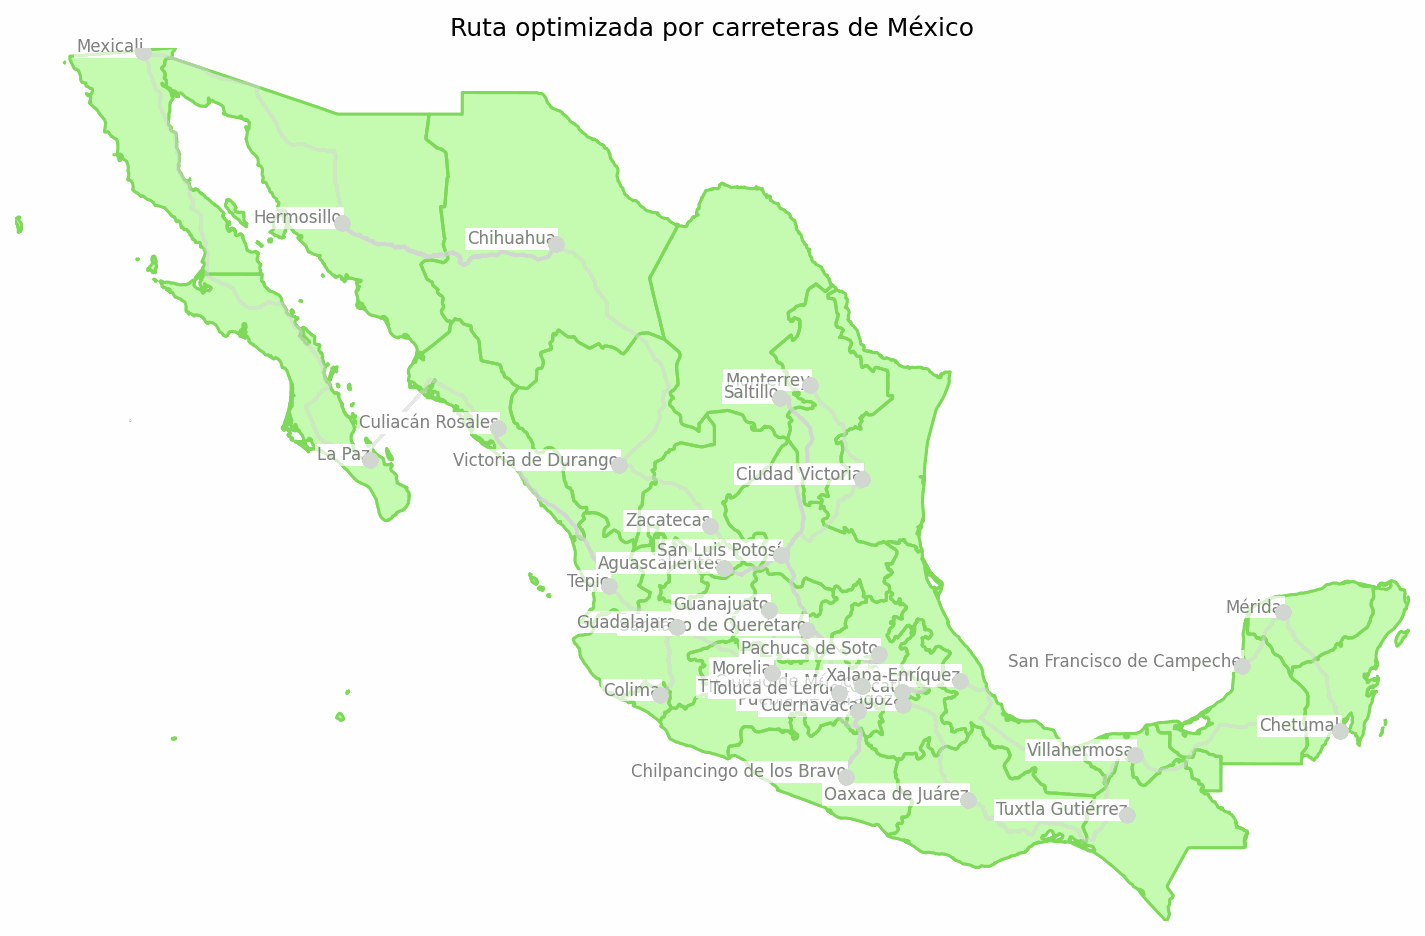

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os
import geopandas as gpd
from IPython.display import Image, display
import openrouteservice as ors
import numpy as np
from tqdm import tqdm
import time

def dividir_en_segmentos(ciudades_df, max_ciudades_por_segmento=5):
    """Divide la ruta en segmentos más pequeños"""
    total_ciudades = len(ciudades_df)
    segmentos = []

    for i in range(0, total_ciudades, max_ciudades_por_segmento - 1):
        if i != 0:
            inicio = i - 1
        else:
            inicio = i
        fin = min(i + max_ciudades_por_segmento, total_ciudades)
        segmentos.append(ciudades_df.iloc[inicio:fin])

    return segmentos

def obtener_ruta_segmento(client, segmento_df):
    """Obtiene la ruta para un segmento de ciudades"""
    coordenadas = [(row['Longitud'], row['Latitud'])
                   for _, row in segmento_df.iterrows()]

    try:
        time.sleep(2)
        ruta = client.directions(
            coordinates=coordenadas,
            profile='driving-car',
            format='geojson'
        )
        return np.array(ruta['features'][0]['geometry']['coordinates'])
    except Exception as e:
        print(f"Error en segmento: {e}")
        return None

def crear_ruta_por_segmentos(ciudades_seleccionadas, mapa_mexico, api_key):
    """Crea una animación de la ruta completa"""
    output_dir = 'frames'
    os.makedirs(output_dir, exist_ok=True)
    client = ors.Client(key=api_key)

    print("Dividiendo ruta en segmentos...")
    segmentos = dividir_en_segmentos(ciudades_seleccionadas)

    print("Obteniendo rutas por segmentos...")
    rutas_segmentos = []
    for segmento in tqdm(segmentos):
        ruta_coords = obtener_ruta_segmento(client, segmento)
        if ruta_coords is not None:
            rutas_segmentos.append(ruta_coords)

    # Calcular el total de puntos en todas las rutas
    total_puntos = sum(len(coords) for coords in rutas_segmentos)
    num_frames = 50  # Número de frames para la animación
    puntos_por_frame = total_puntos / num_frames

    print("Generando frames...")
    for frame in tqdm(range(num_frames + 1)):
        plt.figure(figsize=(12, 8))

        # Dibujar mapa base
        mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')
        mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')

        # Dibujar toda la ruta en gris claro
        for coords in rutas_segmentos:
            plt.plot(coords[:, 0], coords[:, 1],
                    color='lightgray',
                    linewidth=2,
                    alpha=0.5)

        # Calcular cuántos puntos mostrar en este frame
        puntos_a_mostrar = int(frame * puntos_por_frame)
        puntos_mostrados = 0

        # Resaltar la parte de la ruta recorrida hasta ahora
        for coords in rutas_segmentos:
            if puntos_mostrados + len(coords) <= puntos_a_mostrar:
                # Dibujar todo el segmento
                plt.plot(coords[:, 0], coords[:, 1],
                        color='red',
                        linewidth=2.5,
                        alpha=1)
                puntos_mostrados += len(coords)
            elif puntos_mostrados < puntos_a_mostrar:
                # Dibujar parte del segmento
                puntos_restantes = puntos_a_mostrar - puntos_mostrados
                plt.plot(coords[:puntos_restantes, 0],
                        coords[:puntos_restantes, 1],
                        color='red',
                        linewidth=2.5,
                        alpha=1)
                puntos_mostrados = puntos_a_mostrar
            else:
                break

        # Dibujar todas las ciudades
        plt.scatter(ciudades_seleccionadas['Longitud'],
                   ciudades_seleccionadas['Latitud'],
                   color='lightgray',
                   zorder=4,
                   s=50)

        # Calcular cuántas ciudades mostrar basado en el progreso
        ciudades_a_mostrar = int((frame / num_frames) * len(ciudades_seleccionadas))

        # Resaltar ciudades visitadas
        if ciudades_a_mostrar > 0:
            plt.scatter(ciudades_seleccionadas['Longitud'][:ciudades_a_mostrar],
                       ciudades_seleccionadas['Latitud'][:ciudades_a_mostrar],
                       color='blue',
                       zorder=5,
                       s=50)

        # Añadir etiquetas para todas las ciudades
        for i, row in ciudades_seleccionadas.iterrows():
            color = 'blue' if i < ciudades_a_mostrar else 'gray'
            plt.text(row['Longitud'],
                    row['Latitud'],
                    row['Capital'],
                    fontsize=8,
                    ha='right',
                    color=color,
                    bbox=dict(facecolor='white',
                             alpha=0.7,
                             edgecolor='none',
                             pad=1))

        plt.title('Ruta optimizada por carreteras de México')
        plt.grid(False)
        plt.axis('off')
        plt.margins(0)

        plt.xlim(mapa_mexico.total_bounds[0], mapa_mexico.total_bounds[2])
        plt.ylim(mapa_mexico.total_bounds[1], mapa_mexico.total_bounds[3])

        plt.savefig(f'{output_dir}/frame_{frame}.png',
                    bbox_inches='tight',
                    dpi=150,
                    facecolor='white')
        plt.close()

    print("Creando GIF...")
    images = []
    for frame in range(num_frames + 1):
        images.append(imageio.imread(f'{output_dir}/frame_{frame}.png'))

    # GIF con velocidad moderada (0.1 segundos por frame)
    imageio.mimsave('ruta_recorrido_real.gif',
                    images,
                    duration=0.1,
                    loop=0)

    # Limpiar archivos temporales
    for frame in range(num_frames + 1):
        os.remove(f'{output_dir}/frame_{frame}.png')
    os.rmdir(output_dir)

    return Image(filename='ruta_recorrido_real.gif')

# Uso del código
api_key = '5b3ce3597851110001cf62486fa1f0963b114e61aade95eb303e19a2'  # Reemplaza con tu token
resultado = crear_ruta_por_segmentos(ciudades_seleccionadas, mapa_mexico, api_key)
display(resultado)

In [ ]:
print("Mejor ruta encontrada:", mejor_ruta)
print("Costo de la mejor ruta:", mejor_costo)

Mejor ruta encontrada: [26, 4, 19, 20, 28, 12, 6, 16, 11, 14, 21, 10, 15, 13, 8, 17, 24, 2, 1, 25, 5, 9, 31, 0, 23, 27, 18, 7, 29, 22, 30, 3]
Costo de la mejor ruta: 41454.72954497354


Algoritmo genetico

In [ ]:
tamano_poblacion = 150
n_generaciones = 1000
tasa_mutacion = 0.07


In [ ]:
def generar_individuo():
    """
    Genera un individuo para un algoritmo basado en optimización genética o heurística.

    Un individuo representa un recorrido por todas las ciudades, donde el orden
    indica la secuencia en la que se visitarán las ciudades. Se genera como una lista
    de índices de ciudades (del 0 al n_ciudades - 1) dispuestos en un orden aleatorio.

    Returns:
        list: Una lista que contiene los índices de las ciudades en un orden aleatorio.
    """
    individuo = list(range(n_ciudades))
    random.shuffle(individuo)
    return individuo


In [ ]:
def costo_individuo(individuo):
    """
    Calcula el costo total de un recorrido dado por un individuo.

    El costo se define como la suma de las distancias entre las ciudades en el
    orden especificado por el individuo, incluyendo el costo de regresar a la
    ciudad inicial para completar el ciclo.

    Args:
        individuo (list): Una lista de índices que representa un recorrido,
                          donde cada índice corresponde a una ciudad.

    Returns:
        float: El costo total del recorrido.
    """
    costo = sum([costos[individuo[i]][individuo[i+1]] for i in range(n_ciudades -1)])
    costo += costos[individuo[-1]][individuo[0]]  # Retorno al inicio
    return costo


In [ ]:
def seleccionar_padre(poblacion, fitness):
    """
    Selecciona un individuo de la población utilizando un torneo de selección.

    La selección por torneo elige un subconjunto aleatorio de individuos de la población
    y selecciona como padre al individuo con el mejor valor de aptitud (fitness) dentro del torneo.

    Args:
        poblacion (list): Una lista de individuos, donde cada individuo representa un recorrido.
        fitness (list): Una lista de valores de aptitud (fitness) correspondientes a cada individuo
                        en la población, donde un valor menor indica mejor aptitud.

    Returns:
        list: El individuo seleccionado como padre, basado en el mejor fitness del torneo.
    """
    torneo = random.sample(list(zip(poblacion, fitness)), k=5)
    torneo.sort(key=lambda x: x[1])
    return torneo[0][0]


In [ ]:
def cruzamiento(padre1, padre2):
    """
    Realiza un cruzamiento entre dos padres para generar un nuevo individuo (hijo).

    Este cruzamiento utiliza una técnica conocida como "orden parcial" (partially mapped crossover, PMX).
    Se selecciona un segmento del primer padre que se copia directamente al hijo y se completa
    con las ciudades del segundo padre en el orden en que aparecen, evitando duplicados.

    Args:
        padre1 (list): Una lista de índices que representa el recorrido del primer padre.
        padre2 (list): Una lista de índices que representa el recorrido del segundo padre.

    Returns:
        list: Una lista que representa el recorrido del hijo generado tras el cruzamiento.
    """
    inicio, fin = sorted(random.sample(range(n_ciudades), 2))
    hijo = [None]*n_ciudades
    hijo[inicio:fin] = padre1[inicio:fin]
    puntero = fin
    for ciudad in padre2:
        if ciudad not in hijo:
            if puntero >= n_ciudades:
                puntero = 0
            hijo[puntero] = ciudad
            puntero += 1
    return hijo


In [ ]:
def mutacion(individuo):
    """
    Realiza una mutación sobre un individuo intercambiando dos ciudades de su recorrido.

    La mutación ocurre con una probabilidad definida por `tasa_mutacion`. Si se activa,
    selecciona aleatoriamente dos posiciones del recorrido y las intercambia, generando
    una variación en el individuo.

    Args:
        individuo (list): Una lista que representa un recorrido, donde cada índice es
                          una ciudad.

    Returns:
        None: La mutación se realiza in-place, modificando directamente el individuo dado.
    """
    if random.random() < tasa_mutacion:
        i, j = random.sample(range(n_ciudades), 2)
        individuo[i], individuo[j] = individuo[j], individuo[i]


In [ ]:
def ga():
    """
    Implementa un Algoritmo Genético (GA) para resolver un problema de optimización combinatoria.

    El algoritmo busca encontrar el mejor recorrido (individuo) con el costo más bajo en un conjunto
    de soluciones mediante la evolución de una población inicial a través de generaciones.
    Utiliza selección, cruzamiento y mutación como operadores genéticos.
    """

    # Generar población inicial
    poblacion = [generar_individuo() for _ in range(tamano_poblacion)]
    mejor_costo = np.inf
    mejor_individuo = None
    historial_costos = []

    for generacion in range(n_generaciones):
        fitness = [costo_individuo(individuo) for individuo in poblacion]
        nueva_poblacion = []
        for _ in range(tamano_poblacion // 2):
            padre1 = seleccionar_padre(poblacion, fitness)
            padre2 = seleccionar_padre(poblacion, fitness)
            hijo1 = cruzamiento(padre1, padre2)
            hijo2 = cruzamiento(padre2, padre1)
            mutacion(hijo1)
            mutacion(hijo2)
            nueva_poblacion.extend([hijo1, hijo2])
        poblacion = nueva_poblacion

        # Evaluar mejor individuo
        for individuo in poblacion:
            costo = costo_individuo(individuo)
            if costo < mejor_costo:
                mejor_costo = costo
                mejor_individuo = individuo.copy()
        historial_costos.append(mejor_costo)
        print(f"Generación {generacion+1}: Mejor costo = {mejor_costo}")
    return mejor_individuo, mejor_costo, historial_costos


In [ ]:
mejor_individuo, mejor_costo_ga, historial_costos_ga = ga()


Generación 1: Mejor costo = 99884.60341375662
Generación 2: Mejor costo = 96797.24312910056
Generación 3: Mejor costo = 92309.62216825398
Generación 4: Mejor costo = 90407.48872275132
Generación 5: Mejor costo = 82716.52605343914
Generación 6: Mejor costo = 81576.8459878307
Generación 7: Mejor costo = 79728.1006206349
Generación 8: Mejor costo = 78047.96950052907
Generación 9: Mejor costo = 75077.02675026454
Generación 10: Mejor costo = 71712.33777936509
Generación 11: Mejor costo = 70419.7191005291
Generación 12: Mejor costo = 70419.7191005291
Generación 13: Mejor costo = 69570.31061746032
Generación 14: Mejor costo = 68251.33671005291
Generación 15: Mejor costo = 67585.62465343914
Generación 16: Mejor costo = 67585.62465343914
Generación 17: Mejor costo = 66303.98434232805
Generación 18: Mejor costo = 66303.98434232805
Generación 19: Mejor costo = 65463.64670000001
Generación 20: Mejor costo = 65356.52581058202
Generación 21: Mejor costo = 64983.92770582008
Generación 22: Mejor costo

In [ ]:
ruta_ciudades = ciudades_df.iloc[mejor_individuo]['Capital'].values
print("Mejor individuo encontrado:", mejor_individuo)
print("Ruta óptima:")
for ciudad in ruta_ciudades:
    print(ciudad)


Mejor individuo encontrado: [3, 30, 22, 4, 19, 20, 11, 16, 6, 14, 21, 10, 15, 13, 8, 17, 24, 2, 1, 25, 5, 9, 31, 0, 23, 27, 18, 7, 12, 28, 29, 26]
Ruta óptima:
San Francisco de Campeche
Mérida
Chetumal
Tuxtla Gutiérrez
Oaxaca de Juárez
Puebla de Zaragoza
Chilpancingo de los Bravo
Cuernavaca
Ciudad de México
Toluca de Lerdo
Santiago de Querétaro
Guanajuato
Morelia
Guadalajara
Colima
Tepic
Culiacán Rosales
La Paz
Mexicali
Hermosillo
Chihuahua
Victoria de Durango
Zacatecas
Aguascalientes
San Luis Potosí
Ciudad Victoria
Monterrey
Saltillo
Pachuca de Soto
Tlaxcala de Xicohténcatl
Xalapa-Enríquez
Villahermosa


<ipython-input-34-529c4c6e56bc>:51: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))


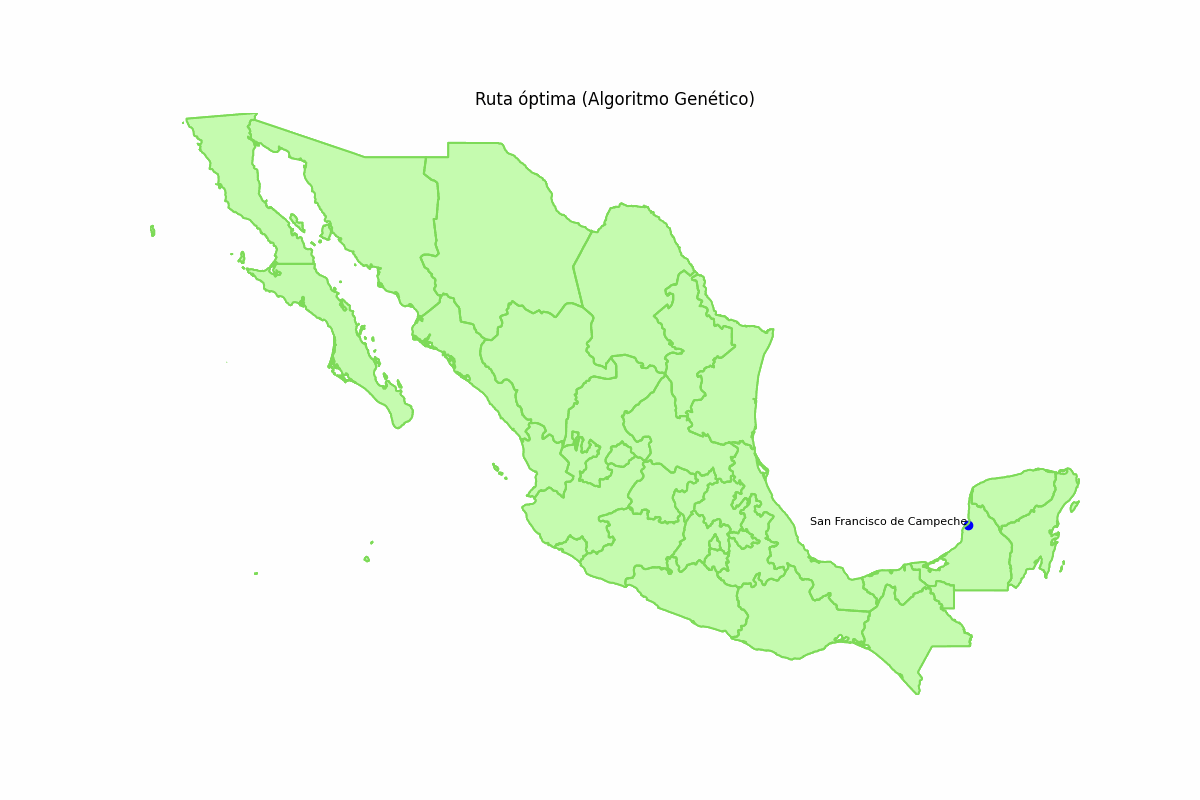

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from IPython.display import Image, display
import openrouteservice as ors
import numpy as np
from tqdm import tqdm
import time
import imageio
import os

# Crear un directorio para guardar las imágenes
output_dir = 'frames_ga'
os.makedirs(output_dir, exist_ok=True)

# Mapa de México
mapa_mexico = gpd.read_file('mx.json')

# Extraer las ciudades seleccionadas en el orden de la mejor ruta
ciudades_seleccionadas = ciudades_df.iloc[mejor_individuo]

# Generar los gráficos para cada paso de la ruta
for k in range(1, len(ciudades_seleccionadas) + 1):
    plt.figure(figsize=(12, 8))

    mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')
    mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')

    # Trazar la línea de la ruta
    plt.plot(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='blue', linestyle='-')

    # Graficar los puntos
    plt.scatter(ciudades_seleccionadas['Longitud'][:k], ciudades_seleccionadas['Latitud'][:k], color='blue')

    # Añadir nombres
    for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
        plt.text(row['Longitud'], row['Latitud'], row['Capital'], fontsize=8, ha='right')

    plt.title('Ruta óptima (Algoritmo Genético)')
    plt.grid(False)
    plt.axis('off')
    plt.margins(0)

    # Guardar cada paso como imagen
    plt.savefig(f'{output_dir}/frame_{k}.png')
    plt.close()

# Crear el GIF
images = []
for k in range(1, len(ciudades_seleccionadas) + 1):
    images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))
imageio.mimsave('ruta_optima_ga.gif', images, duration=3)

# Mostrar el GIF en Colab
Image(filename='ruta_optima_ga.gif')

<ipython-input-35-428b01a9028f>:118: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))


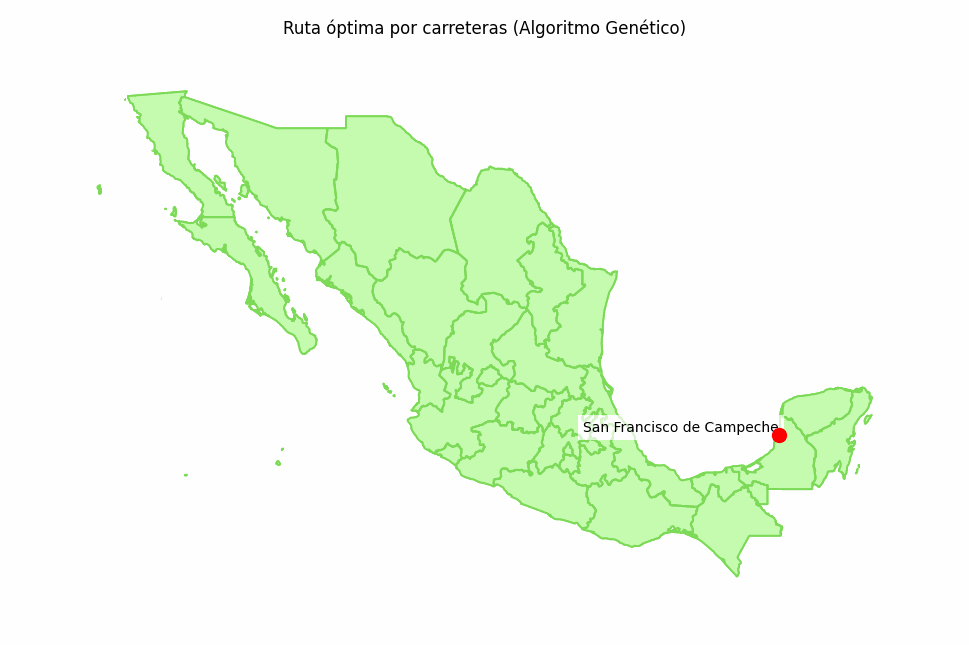

In [ ]:
import openrouteservice as ors
import folium
import matplotlib.pyplot as plt
import imageio
import os
import numpy as np
from IPython.display import Image
import polyline
import time

# Crear un cliente de OpenRouteService con tu API key
ors_client = ors.Client(key='5b3ce3597851110001cf62486fa1f0963b114e61aade95eb303e19a2')

def obtener_ruta_ors(origen, destino):
    """
    Obtiene la ruta entre dos puntos usando OpenRouteService

    Args:
        origen (tuple): (longitud, latitud) del punto de origen
        destino (tuple): (longitud, latitud) del punto de destino

    Returns:
        list: Lista de coordenadas que forman la ruta
    """
    try:
        # Solicitar la ruta a ORS
        ruta = ors_client.directions(
            coordinates=[origen, destino],
            profile='driving-car',
            format='geojson'
        )

        # Extraer las coordenadas de la ruta
        coordenadas = ruta['features'][0]['geometry']['coordinates']
        return coordenadas

    except Exception as e:
        print(f"Error al obtener ruta: {e}")
        # Si hay error, devolver una línea recta entre los puntos
        return [origen, destino]

    # Esperar un segundo para no exceder el límite de la API
    time.sleep(1)

def generar_frames_ruta(ciudades_seleccionadas, mapa_mexico, output_dir='frames_ga'):
    """
    Genera frames para visualizar la ruta paso a paso
    """
    # Crear directorio si no existe
    os.makedirs(output_dir, exist_ok=True)

    # Lista para almacenar todas las rutas
    todas_las_rutas = []

    # Obtener rutas entre cada par de ciudades
    for i in range(len(ciudades_seleccionadas) - 1):
        origen = (
            ciudades_seleccionadas.iloc[i]['Longitud'],
            ciudades_seleccionadas.iloc[i]['Latitud']
        )
        destino = (
            ciudades_seleccionadas.iloc[i + 1]['Longitud'],
            ciudades_seleccionadas.iloc[i + 1]['Latitud']
        )

        ruta = obtener_ruta_ors(origen, destino)
        todas_las_rutas.append(ruta)

    # Generar frames
    for k in range(1, len(ciudades_seleccionadas) + 1):
        plt.figure(figsize=(12, 8))

        # Dibujar el mapa base
        mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')
        mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')

        # Dibujar las rutas hasta el paso actual
        for i in range(min(k-1, len(todas_las_rutas))):
            ruta = todas_las_rutas[i]
            ruta_array = np.array(ruta)
            plt.plot(ruta_array[:, 0], ruta_array[:, 1],
                    color='blue', linestyle='-', linewidth=2, alpha=0.7)

        # Marcar las ciudades visitadas
        plt.scatter(
            ciudades_seleccionadas['Longitud'][:k],
            ciudades_seleccionadas['Latitud'][:k],
            color='red', s=100, zorder=5
        )

        # Añadir nombres de ciudades
        for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
            plt.text(
                row['Longitud'], row['Latitud'],
                row['Capital'],
                fontsize=10,
                ha='right',
                va='bottom',
                bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
            )

        plt.title('Ruta óptima por carreteras (Algoritmo Genético)')
        plt.grid(False)
        plt.axis('off')
        plt.margins(0.1)

        # Guardar frame
        plt.savefig(f'{output_dir}/frame_{k}.png',
                   bbox_inches='tight', pad_inches=0.2)
        plt.close()

def crear_gif(num_frames, output_dir='frames_ga', duration=1):
    """
    Crea un GIF animado a partir de los frames generados
    """
    images = []
    for k in range(1, num_frames + 1):
        images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))
    imageio.mimsave('ruta_optima_ga.gif', images, duration=duration)
    return Image(filename='ruta_optima_ga.gif')

# Uso del código
generar_frames_ruta(ciudades_seleccionadas, mapa_mexico)
crear_gif(len(ciudades_seleccionadas))

<ipython-input-117-f8aace34bbda>:117: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



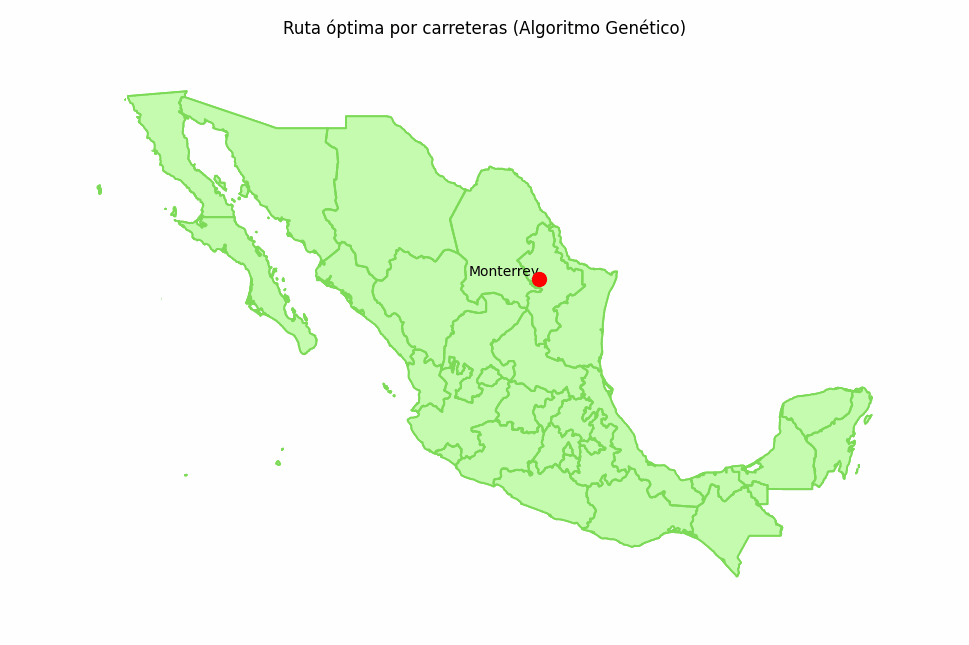

In [ ]:
import random
import numpy as np
import openrouteservice as ors
import folium
import matplotlib.pyplot as plt
import imageio
import os
import time
from IPython.display import Image

# Crear un cliente de OpenRouteService con tu API key
ors_client = ors.Client(key='5b3ce3597851110001cf62486fa1f0963b114e61aade95eb303e19a2')

def obtener_ruta_ors(origen, destino):
    """
    Obtiene la ruta entre dos puntos usando OpenRouteService

    Args:
        origen (tuple): (longitud, latitud) del punto de origen
        destino (tuple): (longitud, latitud) del punto de destino

    Returns:
        list: Lista de coordenadas que forman la ruta
    """
    try:
        # Solicitar la ruta a ORS
        ruta = ors_client.directions(
            coordinates=[origen, destino],
            profile='driving-car',
            format='geojson'
        )

        # Extraer las coordenadas de la ruta
        coordenadas = ruta['features'][0]['geometry']['coordinates']
        return coordenadas

    except Exception as e:
        print(f"Error al obtener ruta: {e}")
        # Si hay error, devolver una línea recta entre los puntos
        return [origen, destino]

    # Esperar un segundo para no exceder el límite de la API
    time.sleep(1)

def generar_frames_ruta(ciudades_seleccionadas, mapa_mexico, output_dir='frames_ga'):
    """
    Genera frames para visualizar la ruta paso a paso
    """
    # Crear directorio si no existe
    os.makedirs(output_dir, exist_ok=True)

    # Lista para almacenar todas las rutas
    todas_las_rutas = []

    # Obtener rutas entre cada par de ciudades
    for i in range(len(ciudades_seleccionadas) - 1):
        origen = (
            ciudades_seleccionadas.iloc[i]['Longitud'],
            ciudades_seleccionadas.iloc[i]['Latitud']
        )
        destino = (
            ciudades_seleccionadas.iloc[i + 1]['Longitud'],
            ciudades_seleccionadas.iloc[i + 1]['Latitud']
        )

        ruta = obtener_ruta_ors(origen, destino)
        todas_las_rutas.append(ruta)

    # Generar frames
    for k in range(1, len(ciudades_seleccionadas) + 1):
        plt.figure(figsize=(12, 8))

        # Dibujar el mapa base
        mapa_mexico.boundary.plot(ax=plt.gca(), color='#7DDA58')
        mapa_mexico.plot(ax=plt.gca(), color='#C6FCB0', edgecolor='#7DDA58')

        # Dibujar las rutas hasta el paso actual
        for i in range(min(k-1, len(todas_las_rutas))):
            ruta = todas_las_rutas[i]
            ruta_array = np.array(ruta)
            plt.plot(ruta_array[:, 0], ruta_array[:, 1],
                    color='blue', linestyle='-', linewidth=2, alpha=0.7)

        # Marcar las ciudades visitadas
        plt.scatter(
            ciudades_seleccionadas['Longitud'][:k],
            ciudades_seleccionadas['Latitud'][:k],
            color='red', s=100, zorder=5
        )

        # Añadir nombres de ciudades
        for i, row in ciudades_seleccionadas.iloc[:k].iterrows():
            plt.text(
                row['Longitud'], row['Latitud'],
                row['Capital'],
                fontsize=10,
                ha='right',
                va='bottom'
            )

        plt.title('Ruta óptima por carreteras (Algoritmo Genético)')
        plt.grid(False)
        plt.axis('off')
        plt.margins(0.1)

        # Guardar frame
        plt.savefig(f'{output_dir}/frame_{k}.png',
                   bbox_inches='tight', pad_inches=0.2)
        plt.close()

def crear_gif(num_frames, output_dir='frames_ga', duration=1):
    """
    Crea un GIF animado a partir de los frames generados
    """
    images = []
    for k in range(1, num_frames + 1):
        images.append(imageio.imread(f'{output_dir}/frame_{k}.png'))
    imageio.mimsave('ruta_optima_ga.gif', images, duration=duration)
    return Image(filename='ruta_optima_ga.gif')

# Uso del código
generar_frames_ruta(ciudades_seleccionadas, mapa_mexico)
crear_gif(len(ciudades_seleccionadas))
